In [1]:
import pandas as pd

In [2]:
# 귀하에게 제공된 데이터는 다음과 같은 클라이언트 데이터로 구성됩니다:
# 클라이언트의 나이, 직업 유형, 결혼 상태 등. 클라이언트 데이터 외에도 통화와 관련된 정보(예: 통화 시간, 통화가 이루어진 날짜 및 월 등)도 제공됩니다.
# 이러한 정보를 바탕으로 클라이언트가 정기 예금에 가입할지 여부를 예측하는 것이 귀하의 과제입니다.
# https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data?select=train.csv

# https://chatgpt.com/share/67772c35-bd98-8002-9ec6-a1d02650aef3

In [3]:
data = pd.read_csv('train.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# 기본 통계량 및 결측치 분석
# 카테고리형 변수의 분포 확인
# 연속형 변수의 히스토그램 및 상관관계 분석
# 클라이언트 예금 가입 여부(Y)에 따른 주요 변수 비교
# 월별 및 직업별 가입률 분석

In [6]:
#1. 기본 통계량 및 결측치 분석
basic_stats = data.describe(include='all').transpose()
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# 2. 카테고리형 변수의 분포 확인
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
categorical_distributions = {var: data[var].value_counts() for var in categorical_vars}
categorical_distributions

{'job': blue-collar      9732
 management       9458
 technician       7597
 admin.           5171
 services         4154
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 unknown           288
 Name: job, dtype: int64,
 'marital': married     27214
 single      12790
 divorced     5207
 Name: marital, dtype: int64,
 'education': secondary    23202
 tertiary     13301
 primary       6851
 unknown       1857
 Name: education, dtype: int64,
 'default': no     44396
 yes      815
 Name: default, dtype: int64,
 'housing': yes    25130
 no     20081
 Name: housing, dtype: int64,
 'loan': no     37967
 yes     7244
 Name: loan, dtype: int64,
 'contact': cellular     29285
 unknown      13020
 telephone     2906
 Name: contact, dtype: int64,
 'month': may    13766
 jul     6895
 aug     6247
 jun     5341
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 de

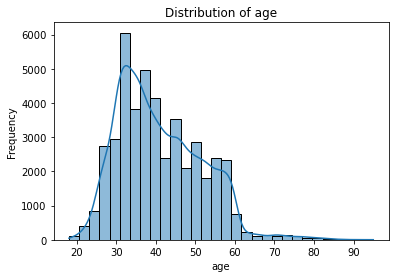

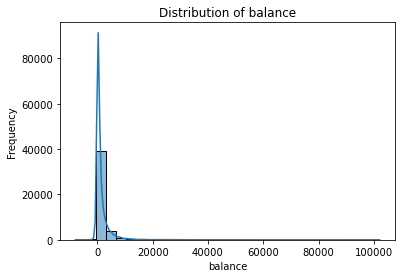

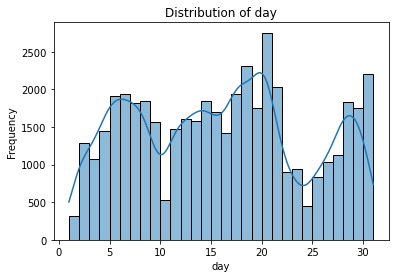

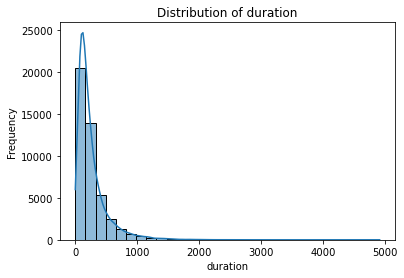

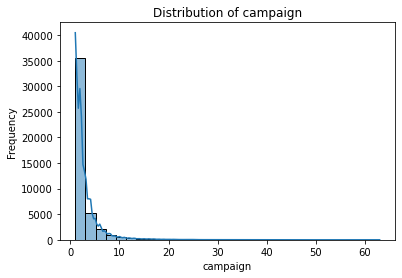

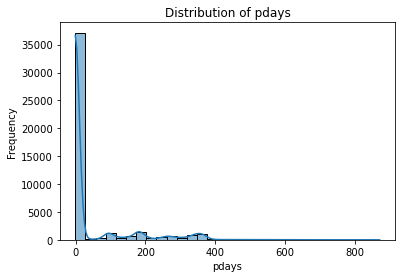

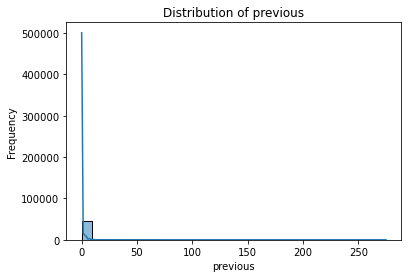

In [8]:
# 3. 연속형 변수의 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns
numeric_vars = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

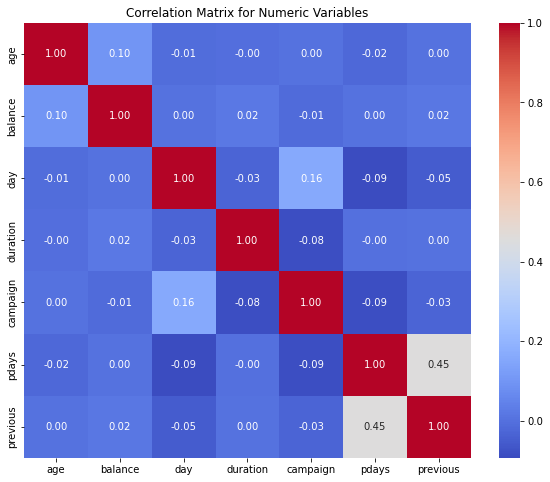

In [9]:
# 4. 상관관계 히트맵
# 다중 공산성 - 상관성이 너무 높은 변수(x)가 있으면 하나를 제거 해주는 게 좋다.(0.8 이상이면 사용하지 않음) 
# 
 
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Variables")
plt.show()

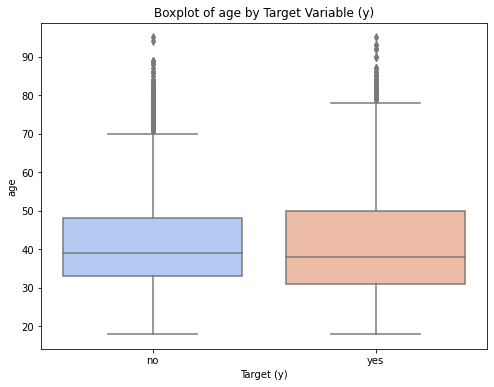

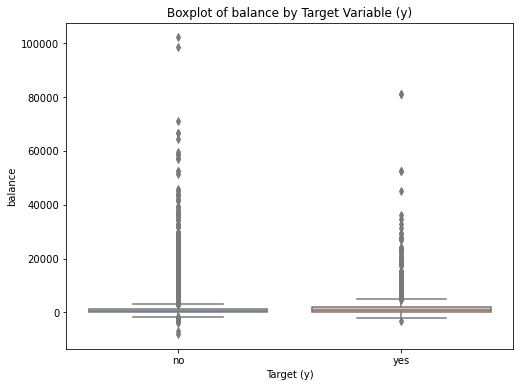

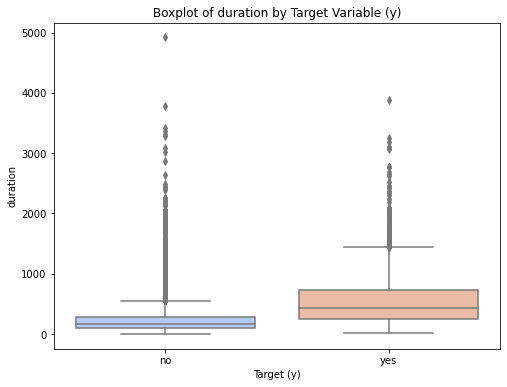

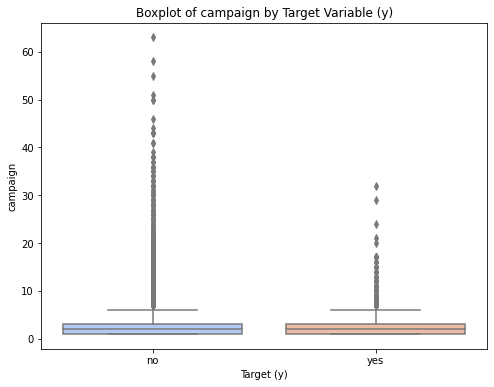

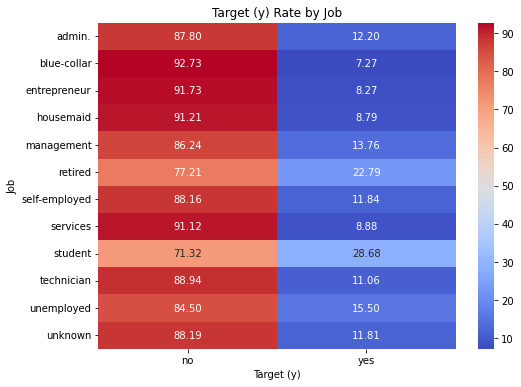

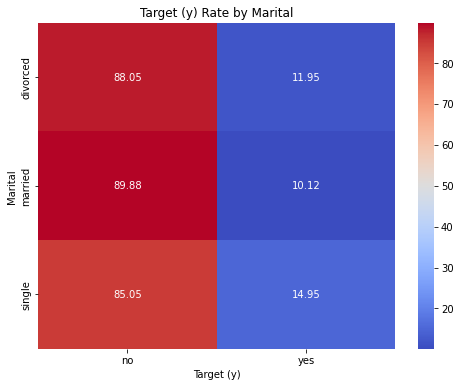

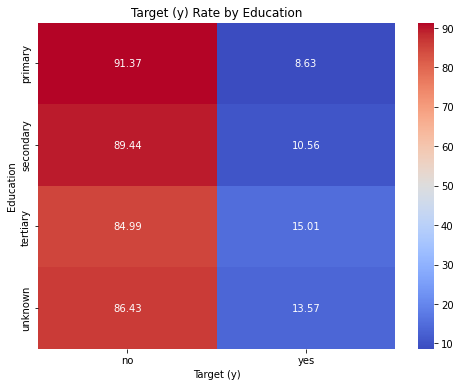

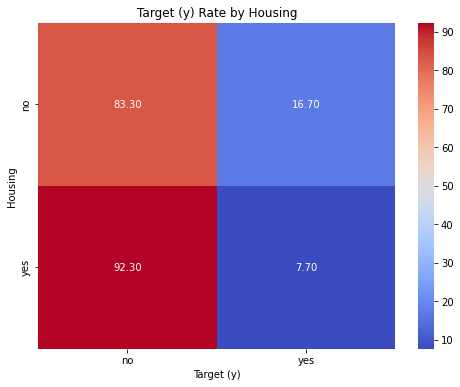

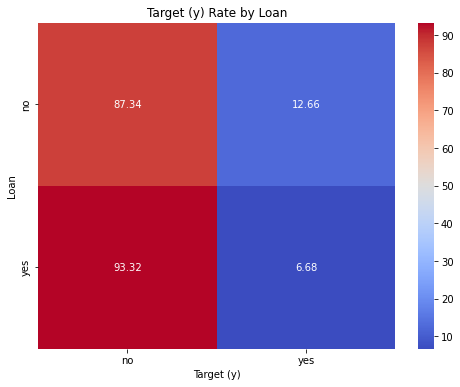

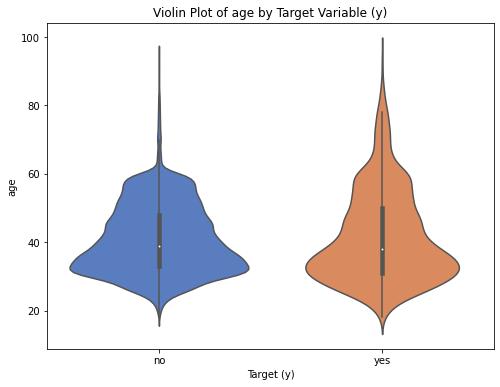

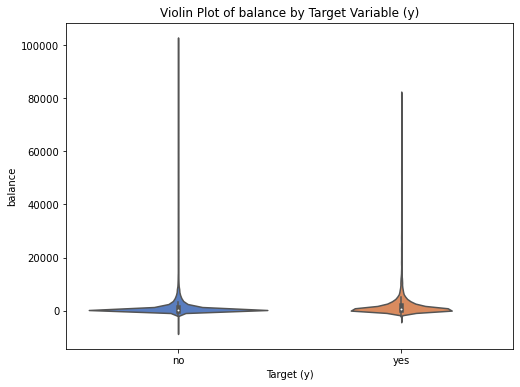

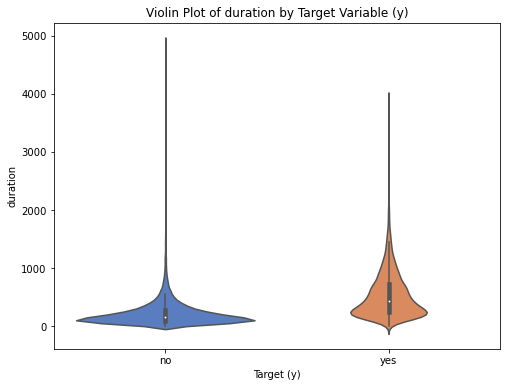

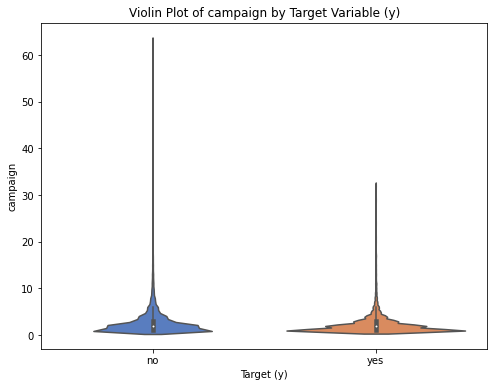

In [10]:
# 5. Boxplot: deposit와 숫자형 변수 간의 관계 시각화
# Strip and standardize column names to ensure 'y' is properly accessible
#data.columns = data.columns.str.strip()

# Retry the boxplot for numeric variables and 'y'
key_numeric_vars = ["age", "balance", "duration", "campaign"]
for var in key_numeric_vars:
    plt.figure(figsize=(8, 6))  # Set the plot size
    sns.boxplot(data=data, x="y", y=var, palette="coolwarm")  # Create Boxplot
    plt.title(f"Boxplot of {var} by Target Variable (y)")  # Set title
    plt.xlabel("Target (y)")  # X-axis label
    plt.ylabel(var)  # Y-axis label
    plt.show()

# Heatmap for categorical variables
categorical_vars = ["job", "marital", "education", "housing", "loan"]
for var in categorical_vars:
    cross_tab = pd.crosstab(data[var], data["y"], normalize="index") * 100
    plt.figure(figsize=(8, 6))  # Set the plot size
    sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt=".2f")  # Create heatmap
    plt.title(f"Target (y) Rate by {var.capitalize()}")  # Set title
    plt.ylabel(var.capitalize())  # Y-axis label
    plt.xlabel("Target (y)")  # X-axis label
    plt.show()

# Violin plot for distribution analysis of numeric variables with respect to target 'y'
for var in key_numeric_vars:
    plt.figure(figsize=(8, 6))  # Set the plot size
    sns.violinplot(data=data, x="y", y=var, palette="muted")  # Create violin plot
    plt.title(f"Violin Plot of {var} by Target Variable (y)")  # Set title
    plt.xlabel("Target (y)")  # X-axis label
    plt.ylabel(var)  # Y-axis label
    plt.show()

In [11]:
# 주요 결과:
# Boxplot:
# balance와 duration 값은 예금을 가입한 그룹에서 더 높은 중앙값을 가지는 경향이 있습니다.
# campaign 변수에서는 큰 차이가 나타나지 않으며, 일부 이상치가 관찰됩니다.

# Heatmap:
# job, marital, education, housing, loan 등의 범주형 변수와 y 간 비율을 비교한 결과:
# "관리자(management)" 직업군은 가입 비율이 상대적으로 높음.
# 대출 여부에 따라 비율 차이가 나타납니다.

# Violin Plot:
# 숫자형 변수의 전체 분포를 시각적으로 비교한 결과, balance와 duration에서 가입 여부(y=yes/no)에 따른 분포 차이가 뚜렷하게 보입니다.

In [12]:
#IV Value구하기(높을수록 좋지만 1보다 크면 검증 필요)

In [13]:
# Convert the 'y' column to binary integers
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Verify the transformation
print(data['y'].value_counts())

0    39922
1     5289
Name: y, dtype: int64


In [14]:
import numpy as np
import pandas as pd

def calculate_iv(data, feature, target):
    """
    Calculate Information Value (IV) for a given feature and target.

    Parameters:
    - data: DataFrame containing the data
    - feature: The feature column name
    - target: The target column name

    Returns:
    - IV value
    """
    # Create a cross-tabulation of the feature and target
    cross_tab = pd.crosstab(data[feature], data[target], normalize='columns')
    cross_tab.columns = ['Bad', 'Good']  # Assuming 0 -> Bad, 1 -> Good

    # Calculate WOE and IV
    cross_tab['WOE'] = np.log((cross_tab['Good'] + 1e-10) / (cross_tab['Bad'] + 1e-10))
    cross_tab['IV'] = (cross_tab['Good'] - cross_tab['Bad']) * cross_tab['WOE']

    return cross_tab['IV'].sum()

# Calculate IV for each variable
iv_values = {}
for feature in data.columns:
    if feature != 'y':  # Skip the target variable
        iv_values[feature] = calculate_iv(data, feature, 'y')

# Convert IV results to a DataFrame for better visualization
iv_results = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV']).sort_values(by='IV', ascending=False)

iv_results

,Feature,IV
5,balance,6.492728
11,duration,4.684686
13,pdays,0.946808
15,poutcome,0.514609
10,month,0.436131
8,contact,0.300396
14,previous,0.250271
0,age,0.242228
6,housing,0.188681
12,campaign,0.179739


In [15]:
# 코드 설명
# calculate_iv 함수:

# 범주형 또는 연속형 변수에서 Bad와 Good 비율을 계산.
# WOE를 계산하고 이를 기반으로 IV를 계산.
# IV 값 계산:

# 모든 변수에 대해 y와의 IV 값을 계산.
# 결과를 내림차순으로 정렬.
# IV 결과
# IV 값이 높은 변수는 타겟 변수(y)에 더 큰 영향을 미칩니다.
# IV 값에 따라 변수의 유용성을 평가할 수 있습니다:
# < 0.02: 매우 약한 예측력
# 0.02 ~ 0.1: 약한 예측력
# 0.1 ~ 0.3: 중간 예측력
# > 0.3: 강한 예측력

In [16]:
def calculate_iv_with_counts_target_rate_and_y(data, feature, target, bins=None):
    """
    Calculate Information Value (IV), target rate, count, and target count for a given feature and target.
    Supports binning for continuous variables and categorical variables directly.

    Parameters:
    - data: DataFrame containing the data
    - feature: The feature column name
    - target: The target column name
    - bins: Number of bins for continuous variables (None for categorical)

    Returns:
    - A DataFrame with WOE, IV, target rate, count, target count (y), and other statistics for each bin/category
    - Total IV value
    """
    # Handle continuous variables with binning
    if bins is not None and pd.api.types.is_numeric_dtype(data[feature]):
        data['temp_bin'] = pd.qcut(data[feature], q=bins, duplicates='drop')
        group = data.groupby('temp_bin')[target]
    else:  # Handle categorical variables
        group = data.groupby(feature)[target]

    # Calculate Good and Bad counts
    stats = group.agg(['count', 'sum'])
    stats.columns = ['Total', 'Good']
    stats['Bad'] = stats['Total'] - stats['Good']

    # Calculate Good and Bad distributions
    stats['Good_Dist'] = stats['Good'] / stats['Good'].sum()
    stats['Bad_Dist'] = stats['Bad'] / stats['Bad'].sum()

    # Calculate WOE and IV
    stats['WOE'] = np.log((stats['Good_Dist'] + 1e-10) / (stats['Bad_Dist'] + 1e-10))
    stats['IV'] = (stats['Good_Dist'] - stats['Bad_Dist']) * stats['WOE']

    # Calculate target rate, count, and target count (y)
    stats['Target_Rate'] = stats['Good'] / stats['Total']
    stats['Count'] = stats['Total']
    stats['Target_Count'] = stats['Good']

    return stats[['WOE', 'IV', 'Target_Rate', 'Count', 'Target_Count']], stats['IV'].sum()


# Update the main processing loop to include target rate, count, and target count
iv_results = []
for feature in data.columns:
    if feature != 'y':  # Skip the target variable
        if pd.api.types.is_numeric_dtype(data[feature]):
            iv_bins, iv_total = calculate_iv_with_counts_target_rate_and_y(data, feature, 'y', bins=5)  # Use 5 bins for numeric variables
        else:
            iv_bins, iv_total = calculate_iv_with_counts_target_rate_and_y(data, feature, 'y')  # No binning for categorical variables
        iv_results.append({'Feature': feature, 'IV_Total': iv_total, 'IV_Bins': iv_bins})

# Create iv_bins_dict for storing detailed bins
iv_bins_dict = {res['Feature']: res['IV_Bins'] for res in iv_results}

# Combine all IV bins into a single DataFrame for easier inspection
iv_bins_table = []

for feature, iv_bins in iv_bins_dict.items():
    if not iv_bins.empty:
        temp_df = iv_bins.reset_index()
        temp_df['Feature'] = feature
        # Add the total IV value for the feature
        total_iv = next(res['IV_Total'] for res in iv_results if res['Feature'] == feature)
        temp_df['Total_IV'] = total_iv
        iv_bins_table.append(temp_df)

# Concatenate all the IV details into a single DataFrame
if iv_bins_table:
    iv_bins_table_df = pd.concat(iv_bins_table, ignore_index=True)
    # Drop unnecessary columns
    columns_to_drop = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
    iv_bins_table_df = iv_bins_table_df.drop(columns=columns_to_drop, errors='ignore')
    # Display the updated IV details
    # tools.display_dataframe_to_user(name="IV Bins Details with Counts, Target Rate, and Target Count for All Features", dataframe=iv_bins_table_df)
else:
    print("No valid IV bins to display.")


In [17]:
# Re-initialize iv_bins_table and ensure correct data handling
iv_bins_table = []

# Check and process IV results and bins
for feature, iv_bins in iv_bins_dict.items():
    if not iv_bins.empty:  # Ensure the IV bins are not empty
        temp_df = iv_bins.reset_index()
        temp_df['Feature'] = feature
        # Add the total IV value for the feature
        total_iv = next(res['IV_Total'] for res in iv_results if res['Feature'] == feature)
        temp_df['Total_IV'] = total_iv
        iv_bins_table.append(temp_df)

# Concatenate all the IV details into a single DataFrame if there are valid entries
if iv_bins_table:
    iv_bins_table_df = pd.concat(iv_bins_table, ignore_index=True)
    # Drop unnecessary columns
    columns_to_drop = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
    iv_bins_table_df = iv_bins_table_df.drop(columns=columns_to_drop, errors='ignore')  # Avoid error if column not present
    # Display the updated IV details
    # tools.display_dataframe_to_user(name="IV Bins Details with Total IV for All Features (Filtered)", dataframe=iv_bins_table_df)
else:
    print("No valid IV bins to display.")


In [ ]:
# Sort the DataFrame by 'Total_IV' in descending order and within each feature by bin in ascending order
iv_bins_table_df = iv_bins_table_df.sort_values(
    by=['Total_IV', 'temp_bin'],  # Sort by 'Total_IV' first, then by bin ('temp_bin')
    ascending=[False, True]   # 'Total_IV' descending, 'index' ascending
).reset_index(drop=True)

# Save the sorted DataFrame to an Excel file
iv_bins_table_df.to_excel('iv_results.xlsx', index=False)

# Display the sorted DataFrame
iv_bins_table_df


,temp_bin,WOE,IV,Target_Rate,Count,Target_Count,Feature,Total_IV,poutcome
0,"(-0.001, 89.0]",-2.898351,0.620067,0.007249,9105,66,duration,1.394044,NaN
1,"(89.0, 147.0]",-1.232223,0.190697,0.037201,9059,337,duration,1.394044,NaN
2,"(147.0, 223.0]",-0.430357,0.031332,0.079318,9027,716,duration,1.394044,NaN
3,"(223.0, 368.0]",0.125202,0.003268,0.130551,8985,1173,duration,1.394044,NaN
4,"(368.0, 4918.0]",1.320837,0.548680,0.331710,9035,2997,duration,1.394044,NaN
...,...,...,...,...,...,...,...,...,...
64,"(24.0, 31.0]",-0.043872,0.000368,0.112528,8780,988,day,0.015914,NaN
65,NaN,0.009417,0.000087,0.117961,44396,5237,default,0.006256,NaN
66,NaN,-0.664716,0.006169,0.063804,815,52,default,0.006256,NaN
67,"(-1.001, 871.0]",0.000000,0.000000,0.116985,45211,5289,pdays,0.000000,NaN


In [21]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,temp_bin
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,"(-0.001, 275.0]"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,"(-0.001, 275.0]"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,"(-0.001, 275.0]"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,"(-0.001, 275.0]"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,"(-0.001, 275.0]"


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 3702, number of negative: 27945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Light

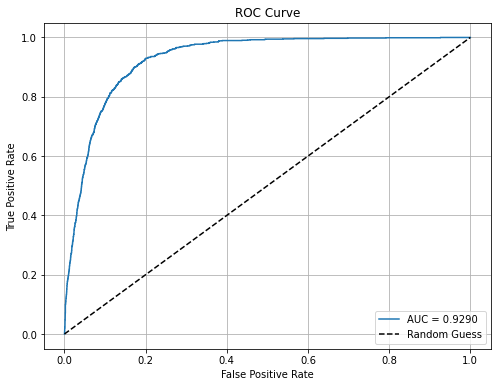

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Drop 'temp_bin' column
data = data.drop(columns=['temp_bin'], errors='ignore')

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split into features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the dataset into train, validation, and test sets (7:1:2)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp )

# Initialize the LightGBM Classifier
model = LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42,
    n_estimators=100
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='auc',
    #early_stopping_rounds=20
)

# Predict on the test set
y_pred = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate AUC on the test set
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score:.4f}")

# Plot AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


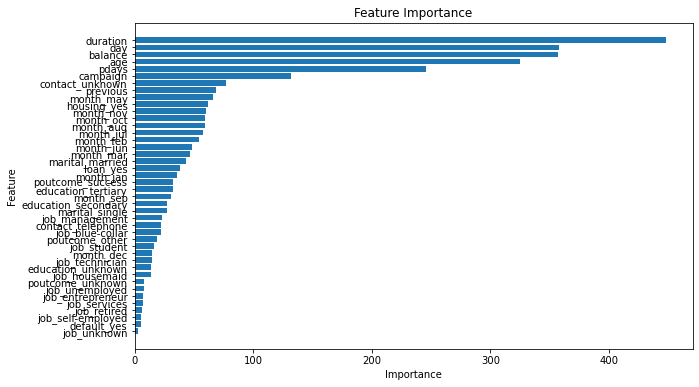

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()  # Invert Y-axis to display the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Display the feature importance as a DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Importance", dataframe=feature_importances)

In [31]:
# Create a DataFrame with test set actual and predicted values
test_results = pd.DataFrame({
    'Actual': y_test.values,
    'pred_proba': y_pred
})

# Display the first few rows of the resulting DataFrame
test_results

,Actual,pred_proba
0,0,0.008665
1,0,0.123497
2,0,0.075340
3,1,0.057681
4,0,0.001511
...,...,...
9038,0,0.013838
9039,0,0.100730
9040,0,0.004562
9041,1,0.286482


In [36]:
# 스코어링
import numpy as np
def get_score(x, epsilon = 1e-15):
    # epsilon을 사용하여 x의 값을 조정
    x = np.clip(x,epsilon,1-epsilon)
    #주어진 공식을 적용
    if x> 0 :
        score = np.round(93.8263394*np.log(x / (1-x)) + 757.0751693)
    else:
        score = 0
    return score

def get_score_g(x):

    score = 0

    if x >=940  : score = 940
    elif x  >=830: score = 830
    elif x  >=720 : score = 720
    elif x  >=610 : score = 610
    elif x  >=500 : score = 500
    elif x  >=390: score = 390
    elif x  >=280: score = 280
    elif x  >=170 : score = 170
    elif x  >=100 : score = 100
    else : score= 0

    return score

In [40]:
%%time
test_results['prob'] = test_results['pred_proba']
test_results['score'] = test_results['prob'].apply(lambda x :  get_score(x))
test_results['score_g'] = test_results['score'].apply(lambda x :  get_score_g(x))
test_results['1000_score'] = test_results['prob']*1000

CPU times: total: 78.1 ms
Wall time: 242 ms


In [41]:
print(min(test_results['prob']))
print(max(test_results['prob']))

0.0002922492692476019
0.9316320428344607


In [42]:
%%time
score_gr = test_results.groupby(['score_g'])['Actual'].agg(['sum','size']).reset_index()
df_score_1 = score_gr.sort_values(['score_g'],ascending=False)
score_gr.sort_values(['score_g'],ascending=False)

CPU times: total: 0 ns
Wall time: 6.04 ms


,score_g,sum,size
9,940,16,19
8,830,202,284
7,720,407,761
6,610,268,884
5,500,99,819
4,390,49,1195
3,280,13,1876
2,170,3,2179
1,100,1,887
0,0,0,139


<timed exec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



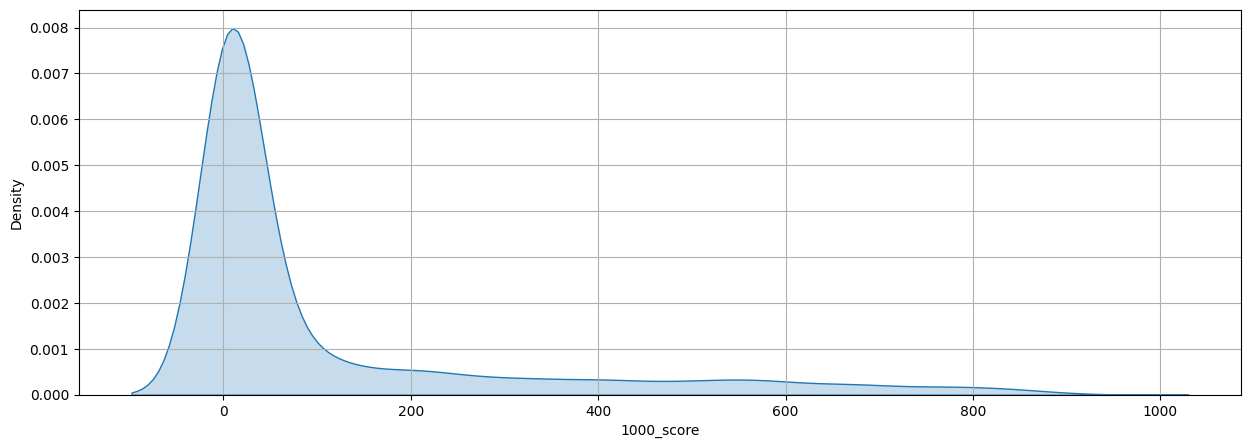

CPU times: user 786 ms, sys: 14.6 ms, total: 801 ms
Wall time: 2.04 s


In [53]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.kdeplot(test_results['1000_score'],shade=True)
plt.grid(True)
plt.show()